# Analysis of ICLR 2018 Reviews

In [1]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=4, suppress=True)

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [25]:
all_revs = pkl.load(open('most_reviews.pkl', 'rb'))

# removing errors
all_revs = [revs for revs in all_revs if len(revs['reviews']) > 0]

print('Number of articles: {}'.format(len(all_revs)))

Number of articles: 481


## Histogram of ratings used

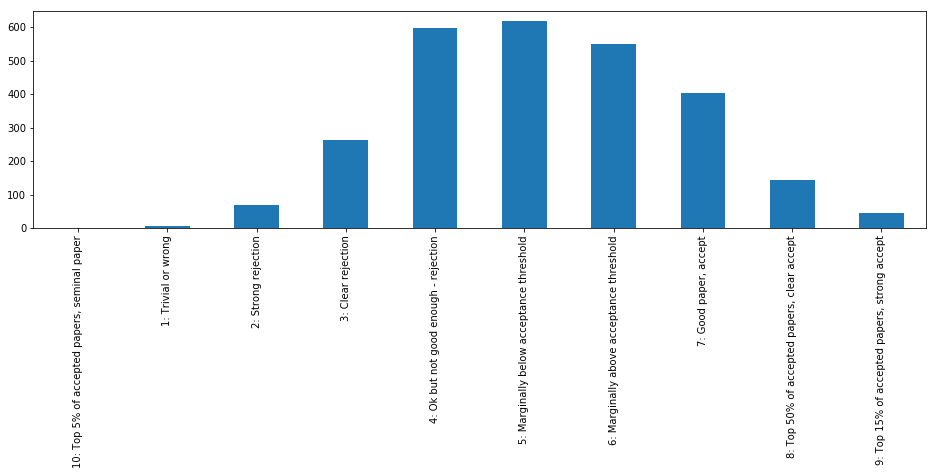

In [30]:
ratings = [r['rating'] for revs in all_revs for r in revs['reviews']]
_ = pd.Series(ratings).value_counts().sort_index().plot(kind='bar')

## How many reviewers per rating?

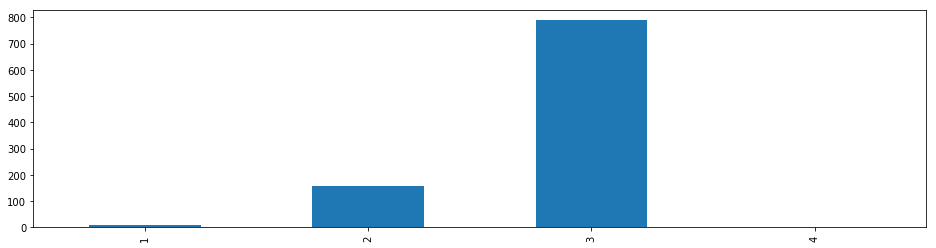

In [47]:
_ = pd.Series([len(r) for r in ratings]).value_counts().sort_index().plot(kind='bar')

## Top 10 articles

### Uniform weighting

In [56]:
ratings = [[int(r['rating'].split(':')[0]) for r in revs['reviews']] for revs in all_revs]
means = np.array([np.mean(r) for r in ratings])
ntop = 10
for i, idx in enumerate(means.argsort()[-ntop:]):
    print('Pos:{}\tMean: {}\tRatings: {} \tUrl: {}'.format(ntop - i, str(means[idx])[:3], ratings[idx], all_revs[idx]['url']))

Pos:10	Mean: 7.5	Ratings: [8, 7] 	Url: https://openreview.net/forum?id=S19dR9x0b
Pos:9	Mean: 8.0	Ratings: [9, 7, 8] 	Url: https://openreview.net/forum?id=Sk2u1g-0-
Pos:8	Mean: 8.0	Ratings: [8, 8, 8] 	Url: https://openreview.net/forum?id=BJOFETxR-
Pos:7	Mean: 8.0	Ratings: [7, 9] 	Url: https://openreview.net/forum?id=Skj8Kag0Z
Pos:6	Mean: 8.0	Ratings: [9, 7] 	Url: https://openreview.net/forum?id=S1JHhv6TW
Pos:5	Mean: 8.0	Ratings: [8, 8] 	Url: https://openreview.net/forum?id=HkL7n1-0b
Pos:4	Mean: 8.0	Ratings: [8, 7, 9] 	Url: https://openreview.net/forum?id=HJsjkMb0Z
Pos:3	Mean: 8.3	Ratings: [10, 7, 8] 	Url: https://openreview.net/forum?id=Hk2aImxAb
Pos:2	Mean: 8.5	Ratings: [8, 9] 	Url: https://openreview.net/forum?id=ryQu7f-RZ
Pos:1	Mean: 9.0	Ratings: [9, 9, 9] 	Url: https://openreview.net/forum?id=Hk6kPgZA-


### Weighted by confidence

In [87]:
conf = [[int(r['confidence'].split(':')[0]) for r in revs['reviews']] for revs in all_revs]
ratconf = np.array([np.sum(np.array(r) * np.array(c) / sum(c)) for r, c in zip(ratings[1:], conf[1:])])
ntop = 10
for i, idx in enumerate(ratconf.argsort()[-ntop:]):
    print('Pos:{}\tMean: {}\tRatings: {}\t Conf: {}\tUrl: {}'.format(ntop - i, str(ratconf[idx])[:3], ratings[idx], conf[idx], all_revs[idx]['url']))

Pos:10	Mean: 7.6	Ratings: [4, 5, 4]	 Conf: [5, 4, 4]	Url: https://openreview.net/forum?id=rJa90ceAb
Pos:9	Mean: 7.8	Ratings: [5]	 Conf: [5]	Url: https://openreview.net/forum?id=rJR2ylbRb
Pos:8	Mean: 8.0	Ratings: [5, 5, 4]	 Conf: [3, 5, 4]	Url: https://openreview.net/forum?id=BkoXnkWAb
Pos:7	Mean: 8.0	Ratings: [6, 7, 7]	 Conf: [3, 4, 4]	Url: https://openreview.net/forum?id=rJGZq6g0-
Pos:6	Mean: 8.0	Ratings: [4, 5, 6]	 Conf: [3, 4, 3]	Url: https://openreview.net/forum?id=ByzvHagA-
Pos:5	Mean: 8.0	Ratings: [7, 6, 8]	 Conf: [4, 4, 5]	Url: https://openreview.net/forum?id=ry6-G_66b
Pos:4	Mean: 8.0	Ratings: [6, 8, 6]	 Conf: [4, 3, 2]	Url: https://openreview.net/forum?id=rJl3yM-Ab
Pos:3	Mean: 8.3	Ratings: [7, 3, 4]	 Conf: [4, 4, 4]	Url: https://openreview.net/forum?id=SkF2D7g0b
Pos:2	Mean: 8.5	Ratings: [6, 4]	 Conf: [3, 4]	Url: https://openreview.net/forum?id=B1NOXfWR-
Pos:1	Mean: 9.0	Ratings: [7, 4, 6]	 Conf: [4, 4, 4]	Url: https://openreview.net/forum?id=rkEfPeZRb


## Top 10 articles with most rating deviation

In [57]:
stds = np.array([np.std(r) for r in ratings])
for i, idx in enumerate(stds.argsort()[-10:]):
    print('Pos: {}\t Rating deviation: {}\t Ratings: {}\t Url: {}'.format(10 - i, str(stds[idx])[:3], ratings[idx], all_revs[idx]['url']))

Pos: 10	 Rating deviation: 2.4	 Ratings: [6, 9, 3]	 Url: https://openreview.net/forum?id=S1Auv-WRZ
Pos: 9	 Rating deviation: 2.4	 Ratings: [9, 3, 6]	 Url: https://openreview.net/forum?id=BkM3ibZRW
Pos: 8	 Rating deviation: 2.4	 Ratings: [6, 3, 9]	 Url: https://openreview.net/forum?id=rknt2Be0-
Pos: 7	 Rating deviation: 2.4	 Ratings: [6, 3, 9]	 Url: https://openreview.net/forum?id=HkXWCMbRW
Pos: 6	 Rating deviation: 2.4	 Ratings: [9, 7, 3]	 Url: https://openreview.net/forum?id=BJij4yg0Z
Pos: 5	 Rating deviation: 2.4	 Ratings: [7, 9, 3]	 Url: https://openreview.net/forum?id=Sy0GnUxCb
Pos: 4	 Rating deviation: 2.5	 Ratings: [4, 9]	 Url: https://openreview.net/forum?id=SyfiiMZA-
Pos: 3	 Rating deviation: 2.5	 Ratings: [4, 9]	 Url: https://openreview.net/forum?id=r1HhRfWRZ
Pos: 2	 Rating deviation: 3.0	 Ratings: [9, 3]	 Url: https://openreview.net/forum?id=ry831QWAb
Pos: 1	 Rating deviation: 3.2	 Ratings: [8, 1, 8]	 Url: https://openreview.net/forum?id=Hk99zCeAb


## Histogram of average ratings

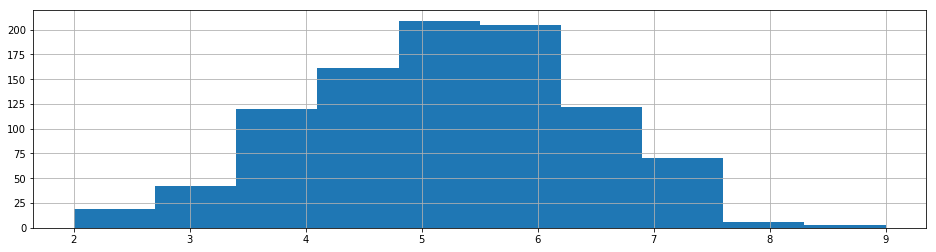

In [58]:
_ = pd.Series(means).hist(bins=10)

## Rating percentiles

In [59]:
pd.Series(means).describe(percentiles=[0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.975])

count    957.000000
mean       5.235284
std        1.140373
min        2.000000
10%        3.666667
30%        4.666667
50%        5.333333
60%        5.666667
70%        6.000000
80%        6.333333
90%        6.666667
95%        7.000000
97.5%      7.333333
max        9.000000
dtype: float64